


## BERT IMPLEMENTATION



In this module, you will be able to obtain the following:
1. Our steps in training the FinBERT model obtained from https://huggingface.co/ProsusAI/finbert on our data, model was trained on data from 01 Jan 09 to 31 Dec 14

2. Classification report and confusion matrix for our newly minted FinBERT model tested on our validation data set 01 Jan 15 to 31 Dec 16.

3. How to load your newly minted FinBERT Model

4. Testing your new model with new investors' comments and see if its {0: Bearish, 1: Nay, 2: Neutral, 3: Bullish, 4: To the Moon!!}

In [ ]:
import pickle
from google.colab import drive

drive.mount("/content/drive")

drive_path = '/content/drive/My Drive/Stock_Data/'

# Deserialize the data structures from a file in your Google Drive
with open(drive_path + '011223_df_train_df_val_dataset_message_with_Normalised_Sentiment_Score', 'rb') as file:
    df_train, df_val = pickle.load(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train

,symbol,message,datetime,user,message_id,Date,Time,label,Sentiment_Score,Sentiment,normalized_Sentiment_score
939696,AAPL,quot alfonsoortiz aapl ridiculous time hell ha...,2014-12-31 15:29:06,413334,30771949,2014-12-31,15:29:06,0,-0.8860,Negative,0.25
939699,AAPL,aapl ridiculous time hell happening,2014-12-31 15:26:44,432557,30771774,2014-12-31,15:26:44,0,-0.7964,Negative,0.50
939700,AAPL,aapl qq moved target apple stood still bueno,2014-12-31 15:25:52,234171,30771722,2014-12-31,15:25:52,0,-0.4939,Neutral,1.25
939701,AAPL,aapl got 39 let ruin new years invest googl amzn,2014-12-31 15:25:48,420847,30771717,2014-12-31,15:25:48,0,-0.5859,Negative,1.00
939705,AAPL,aapl mark get set terrible,2014-12-31 15:20:01,420414,30771327,2014-12-31,15:20:01,0,-0.4767,Neutral,1.25
...,...,...,...,...,...,...,...,...,...,...,...
1145502,AAPL,aapl nice cash today run 529 worked treat cons...,2012-12-18 19:54:37,151373,11073421,2012-12-18,19:54:37,4,0.6705,Positive,4.25
1036134,AAPL,quot peteo aapl iphone launch propels china mo...,2014-02-20 20:05:38,188938,20223513,2014-02-20,20:05:38,4,0.6705,Positive,4.25
2561123,NFLX,love nflx think take world terms broadcasting,2011-01-27 16:41:26,44301,2656651,2011-01-27,16:41:26,4,0.6369,Positive,4.00
942124,AAPL,aapl best launch ever countries ever phone sti...,2014-12-22 15:22:00,209265,30536752,2014-12-22,15:22:00,4,0.5859,Positive,4.00


In [ ]:
pip install tensorflow==2.14


In [ ]:
%pip install simpletransformers
from simpletransformers.classification import ClassificationModel

In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve

In [ ]:
df_train.columns

Index(['symbol', 'message', 'datetime', 'user', 'message_id', 'Date', 'Time',
       'label', 'Sentiment_Score', 'Sentiment', 'normalized_Sentiment_score'],
      dtype='object')

In [ ]:
#df_train = df_train.sample(n=100, random_state=1)  # random_state for reproducibility

In [ ]:
# Make a new DataFrame with just the text and label columns
train_Bert_df = df_train[['message', 'label']]

# for testing purpose to make sure code works
#train_Bert_df = df_train[['Body', 'label']].iloc[:100]

train_Bert_texts  = train_Bert_df['message'].values.tolist()
train_Bert_labels = train_Bert_df['label'].values.tolist()

The next few steps is to train the BERT model using pretrain model from pre-exisiting tensor dataset trained on wiki pages, youtube etc. It is then applied on our dataset

- It takes [] hours to train
- saves model in the drive

In [ ]:
# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())

In [ ]:
#!pip install tensorflow==2.14


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

In [ ]:
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Only for model training, don't run otherwise -- ># Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Encode the labels
le = LabelEncoder()
train_Bert_df['encoded_labels'] = le.fit_transform(train_Bert_df['label'])


# Ensure all data in 'Body' is a string and not empty
train_Bert_df['message'] = train_Bert_df['message'].astype(str)  # Convert to string in case there are non-string types
train_Bert_df = train_Bert_df[train_Bert_df['message'].str.strip().ne('')]  # Remove any rows with empty strings

<ipython-input-24-b153de268c86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Bert_df['encoded_labels'] = le.fit_transform(train_Bert_df['label'])
<ipython-input-24-b153de268c86>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Bert_df['message'] = train_Bert_df['message'].astype(str)  # Convert to string in case there are non-string types


In [ ]:
## Only for model training, don't run otherwise -- > Tokenize the text data
### takes c.10min

encoded_data_train = tokenizer.batch_encode_plus(
    train_Bert_df['message'].tolist(),
    truncation=True,
    padding=True,
    max_length=128
)


In [ ]:
# Only for model training, don't run otherwise -- >
input_ids_train = torch.tensor(encoded_data_train['input_ids'])
attention_masks_train = torch.tensor(encoded_data_train['attention_mask'])
labels_train = torch.tensor(train_Bert_df['encoded_labels'].values)

In [ ]:
# Only for model training, don't run otherwise -- >
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler

# Create a DataLoader
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=32)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Only for model training, don't run otherwise -- > IMPORTANT FUNCTION, takes 5.0hours
# Training loop
num_epochs = 3
model.train()
for epoch in range(num_epochs):
    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0]
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

# Only for model training, don't run otherwise -- > save to drive
model.save_pretrained("/content/drive/My Drive/Model/")


--------------------------------------------------------------------------------------------------------

In [ ]:
### LOAD MODEL FROM HERE
###Step 1
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from torch.utils.data import SequentialSampler
# Load the trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("/content/drive/My Drive/Model/")
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
### Step 2
# Encode the labels
le = LabelEncoder()
df_val['encoded_labels'] = le.fit_transform(df_val['label'])

# Ensure all data in 'Body' is a string and not empty
df_val['message'] = df_val['message'].astype(str)  # Convert to string in case there are non-string types
df_val = df_val[df_val['message'].str.strip().ne('')]  # Remove any rows with empty strings

# Tokenize the text data
encoded_data_test = tokenizer.batch_encode_plus(
    df_val['message'].tolist(),
    truncation=True,
    padding=True,
    max_length=128
)

input_ids_test = torch.tensor(encoded_data_test['input_ids'])
attention_masks_test = torch.tensor(encoded_data_test['attention_mask'])
labels_test = torch.tensor(df_val['encoded_labels'].values)



In [ ]:
### Step 3
# Create a DataLoader
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)

# Evaluation mode
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
#### Step 4, to do the prediction

# Variable to store predictions

import numpy as np

predictions = []

# Predict on test data
for batch in dataloader_test:
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)

# Convert logits to predicted class
preds = np.argmax(predictions, axis=1)

In [ ]:
predictions

array([[ 7.179296  ,  0.9571748 , -2.775113  , -3.1056328 , -2.748775  ],
       [ 5.4097176 ,  3.7284365 , -2.9840326 , -3.3014195 , -3.2937994 ],
       [ 4.106241  ,  5.1548724 , -2.8803473 , -3.1929603 , -3.511794  ],
       ...,
       [-1.8316143 , -2.5213392 , -2.2289577 , -0.08718161,  8.215545  ],
       [-1.5785948 , -2.4067762 , -1.974309  , -0.8216829 ,  8.155077  ],
       [-2.900181  , -2.6851768 , -2.9087124 ,  3.4768772 ,  6.1982865 ]],
      dtype=float32)

In [ ]:
y = df_val['label'].tolist()

accuracy_score(y, preds)

0.9678156612963656

In [ ]:
print(classification_report(y, preds, digits=3))

              precision    recall  f1-score   support

           0      0.966     0.981     0.974     49099
           1      0.950     0.951     0.950     47164
           2      0.990     0.966     0.978     48896
           3      0.963     0.954     0.959     47330
           4      0.969     0.986     0.977     47721

    accuracy                          0.968    240210
   macro avg      0.968     0.968     0.968    240210
weighted avg      0.968     0.968     0.968    240210



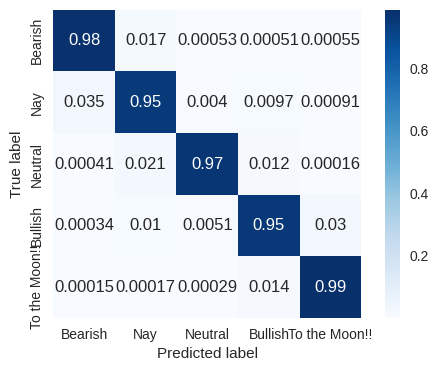

In [ ]:
### Step 5: Analysis and evaluation
# Confusion Matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(y, preds, normalize='true'), range(5), range(5))

labels = ["Bearish", "Nay", "Neutral", "Bullish", "To the Moon!!"]

model_name = "FinBERT_base"
plt.figure(figsize=(6,4))
ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
ax.set_xticklabels(labels)  # Set x-axis labels
ax.set_yticklabels(labels)  # Set y-axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Save the plot
#plt.savefig(model_name + "_" + label.lower() + ".eps")

plt.show()

In [ ]:
### testing the model

new_sentence = "Great share. to buy APPL. Tops!"
tokenized_sentence = tokenizer.encode(new_sentence, add_special_tokens=True)
input_ids = torch.tensor([tokenized_sentence]).to(device)
with torch.no_grad():
    outputs = model(input_ids)

predictions = torch.nn.functional.softmax(outputs[0], dim=-1)
predicted_class = torch.argmax(predictions).item()

print(predicted_class)

4


In [ ]:
### testing the model

new_sentence = "APPL shares sucks. will not bet on it"
tokenized_sentence = tokenizer.encode(new_sentence, add_special_tokens=True)
input_ids = torch.tensor([tokenized_sentence]).to(device)
with torch.no_grad():
    outputs = model(input_ids)

predictions = torch.nn.functional.softmax(outputs[0], dim=-1)
predicted_class = torch.argmax(predictions).item()

print(predicted_class)

1


In [ ]:
path="/content/drive/MyDrive/output3.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

NameError: ignored